## __MNIST Classification dataset: ML analysis along with using dimensionality reduction techniques__

The MNIST dataset is a widely used dataset in machine learning and computer vision, particularly for image classification tasks. In scikit-learn, it can be accessed and used for various machine learning algorithms.

#### __Import the necessary libraries__

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### __Loading and inspecting the dataset__

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
# Features
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [5]:
# Target
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
sample_data = X.sample()
sample_data

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
33633       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
33633        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
33633         0         0         0         0         0  

[1 rows x 784 columns]

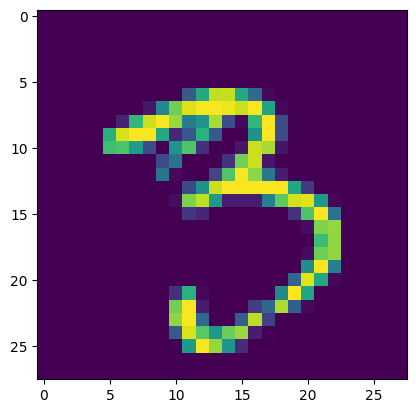

In [7]:
plt.imshow(X.iloc[sample_data.index.values[0],:].values.reshape(28,28))

#### __Perform train-test split__

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape

(56000, 784)

#### __Applying KNN on all the `784` dimensions without performing any dimensionality reduction__


In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

46.407729625701904


In [11]:
accuracy_score(y_test, y_pred)

0.9457857142857143

### __Performing PCA - MNIST Dataset__

#### __Performing PCA without reducing dimensions__

In [12]:
# PCA with no specified components
pca = PCA(n_components=None)

X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)

In [13]:
# Eigenvalues
pca.explained_variance_[:5]

array([40.6329685 , 29.01311301, 26.91849535, 20.8204608 , 18.1047848 ])

In [14]:
# Eigenvectors
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
X_train_1.shape

(56000, 784)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_1, y_train)

start = time.time()
y_pred = knn.predict(X_test_1)
print(time.time() - start)

43.766587018966675


In [ ]:
accuracy_score(y_test,y_pred)

0.9457857142857143

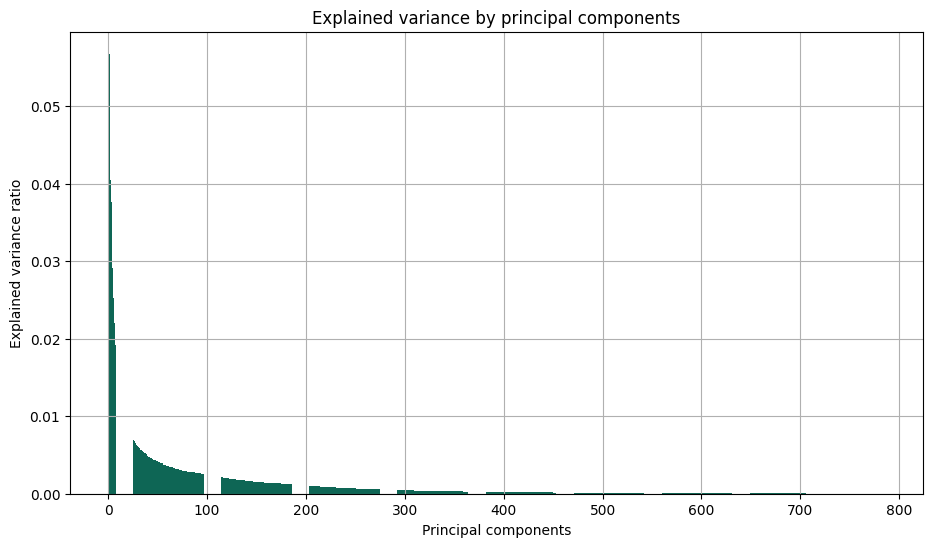

In [ ]:
# Creating a bar chart to check the variance carried by each principal component

plt.figure(figsize=(11,6))
var_exp = pca.explained_variance_ratio_
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), var_exp, color='#0e6655')
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.grid(True)
plt.show()

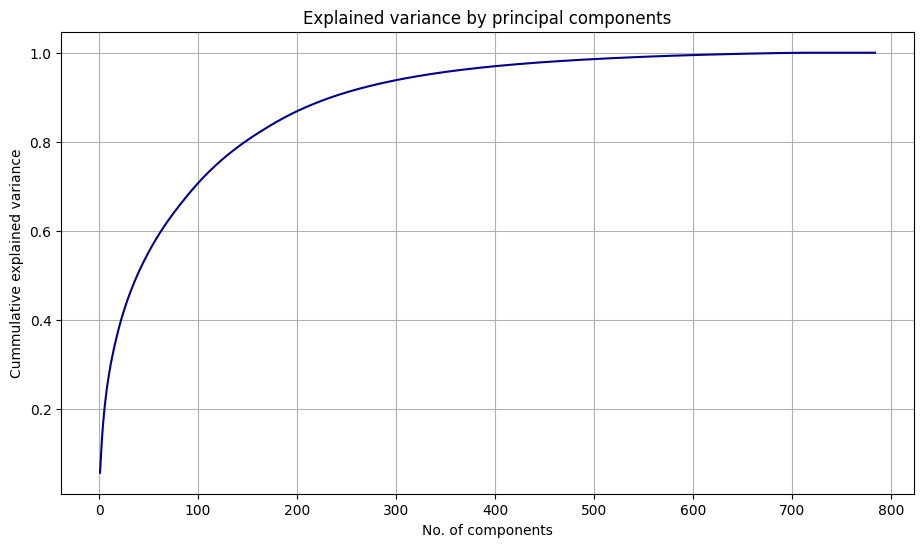

In [ ]:
# Create a chart to check the cummulative variance of the PCs

plt.figure(figsize=(11,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), color='darkblue')
plt.title('Explained variance by principal components')
plt.xlabel('No. of components')
plt.ylabel('Cummulative explained variance')
plt.grid(True)
plt.show()

#### __Performing PCA with reduced components (`from 784 to 400`)__

In [ ]:
# PCA with 400 components
pca = PCA(n_components=400)

X_train_400 = pca.fit_transform(X_train)
X_test_400 = pca.transform(X_test)

In [ ]:
X_train_400.shape

(56000, 400)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_400,y_train)

start = time.time()
y_pred_400 = knn.predict(X_test_400)
print(time.time() - start)

23.774113178253174


In [ ]:
accuracy_score(y_test, y_pred_400)

0.9467142857142857

#### __Performing PCA with reduced components (`from 784 to 200`)__

In [ ]:
# PCA with 200 components
pca = PCA(n_components=200)

X_train_200 = pca.fit_transform(X_train)
X_test_200 = pca.transform(X_test)

In [ ]:
X_train_200.shape

(56000, 200)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_200,y_train)

start = time.time()
y_pred_200 = knn.predict(X_test_200)
print(time.time() - start)

13.291072845458984


In [ ]:
accuracy_score(y_test, y_pred_200)

0.9550714285714286

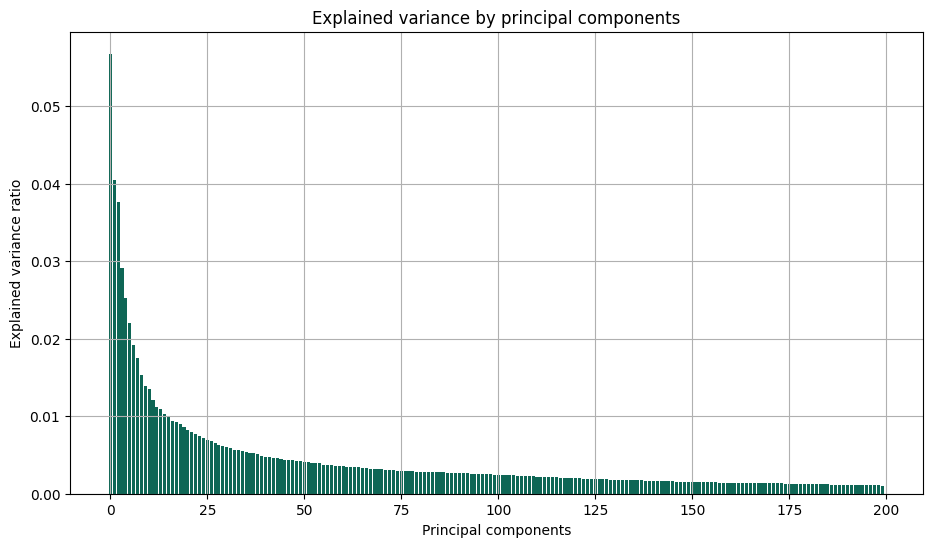

In [ ]:
# Creating a bar chart to check the variance carried by each principal component
plt.figure(figsize=(11,6))
var_exp = pca.explained_variance_ratio_
plt.bar(list(range(len(pca.explained_variance_ratio_))), var_exp, color='#0e6655')
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.grid(True)
plt.show()

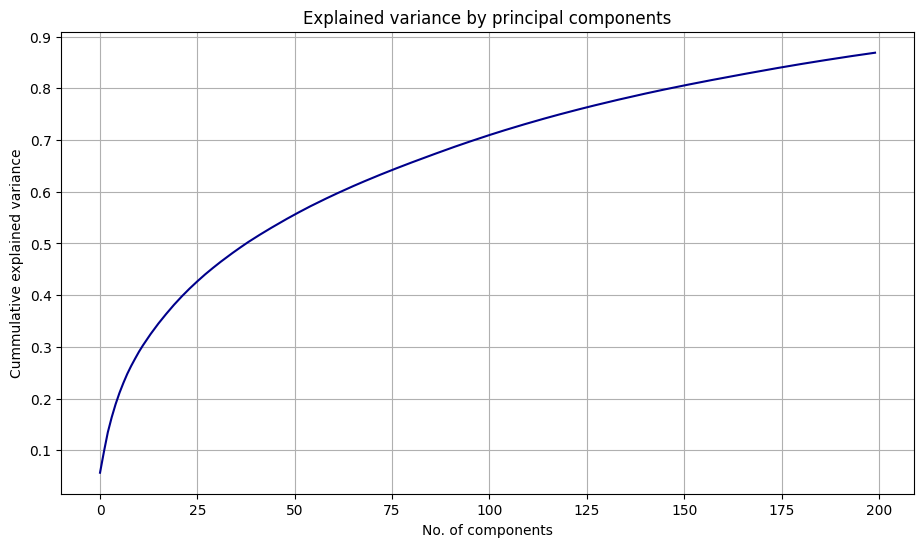

In [ ]:
# Create a chart to check the cummulative variance of the PCs
plt.figure(figsize=(11,6))
plt.plot(list(range(len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_.cumsum(), color='darkblue')
plt.title('Explained variance by principal components')
plt.xlabel('No. of components')
plt.ylabel('Cummulative explained variance')
plt.grid(True)
plt.show()

#### __Performing PCA with 2 components (2D system)__

In [ ]:
# Transforming the dimensions to a 2D coordinate system
pca = PCA(n_components=2)

X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [ ]:
X_train_2.shape

(56000, 2)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_2,y_train)

start = time.time()
y_pred_2 = knn.predict(X_test_2)
print(time.time() - start)

0.9031555652618408


In [ ]:
accuracy_score(y_test,y_pred_2)

0.32107142857142856

In [ ]:
y_train_2 = y_train.astype(str)
plt.figure(figsize=(11,8))
fig = px.scatter(x=X_train_2[:,0],
                 y=X_train_2[:,1],
                 color=y_train_2,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()

<Figure size 1100x800 with 0 Axes>

#### __Performing PCA with 3 components (3D system)__

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)

X_train_3 = pca.fit_transform(X_train)
X_test_3 = pca.transform(X_test)

In [ ]:
X_train_3.shape

(56000, 3)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_3,y_train)

start = time.time()
y_pred_3 = knn.predict(X_test_3)
print(time.time() - start)

0.8679614067077637


In [ ]:
accuracy_score(y_test,y_pred_3)

0.5111428571428571

In [ ]:
y_train_3 = y_train.astype(str)
plt.figure(figsize=(11,8))
fig = px.scatter_3d(x=X_train_3[:,0],
                    y=X_train_3[:,1],
                    z=X_train_3[:,2],
                    color=y_train_3
                   )
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

<Figure size 1100x800 with 0 Axes>

### __Performing LDA - MNIST Dataset__

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
lda.explained_variance_ratio_

array([0.23801142, 0.20214164])

In [ ]:
X_train_lda.shape

(56000, 2)

In [ ]:
y_train_2 = y_train.astype(str)
plt.figure(figsize=(11,8))
fig = px.scatter(x=X_train_lda[:,0],
                 y=X_train_lda[:,1],
                 color=y_train_2,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()

<Figure size 1100x800 with 0 Axes>

### __Applying t-SNE - MNIST Dataset__

In [16]:
from sklearn.manifold import TSNE

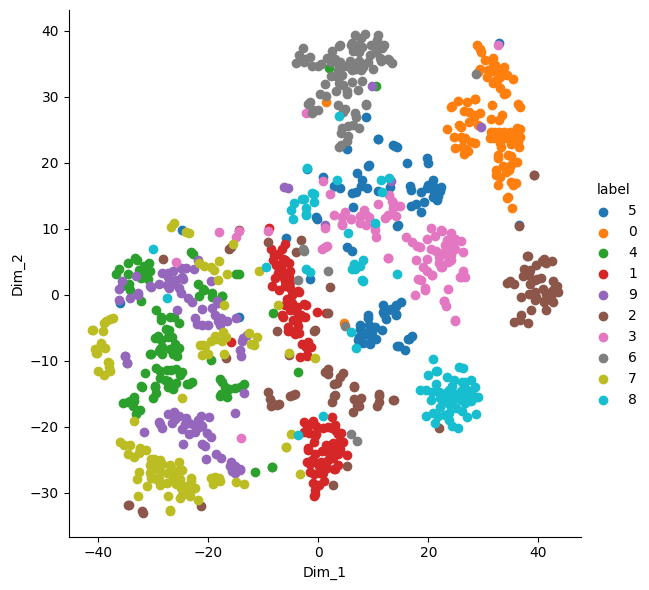

In [20]:
model = TSNE(n_components=2, random_state=42, max_iter=1000)

tsne_data = model.fit_transform(X[:1000])

# Creating a new DataFrame to help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, y[:1000])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

In [21]:
tsne_df

Dim_1      Dim_2 label
0    18.618366  12.561081     5
1    32.842377  24.718767     0
2   -34.609341   4.800138     4
3     -1.21105 -24.975935     1
4   -22.469275  -3.465097     9
..         ...        ...   ...
995 -33.425385 -19.166912     7
996   4.233337  25.254908     6
997  34.924183  17.042023     0
998  13.459119  14.254271     3
999  12.932416  35.569633     6

[1000 rows x 3 columns]